# ECE 324 Final Code

Hogwarts House Sorting based on Dialogue from Harry Potter Movies Dataset Using Stacked LSTM

by Carl Ancheta, Joaquin Arcilla, Sandhi Ganjoo



We noticed that our dataset is imbalanced, so we decided to run the model with 3 different datasets:
1. the original dataset
2. a dataset where we reduce the number of lines for houses with a lot of lines to match the number of lines of the house with the least number of lines
3. a dataset where we increase the number of lines (by duplicating them) for houses with less lines to match the number of lines of the house with the most number of lines


Raw and processed dataset files can be viewed here: https://drive.google.com/drive/folders/1cMWW4QdSiE0vvvYAcRfI-s80A6QFU-p9?usp=sharing

# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing of Characters.csv

Reading the file which contains information about the characters in the Harry Potter movies

In [ ]:
characters_file_path = '/content/drive/My Drive/Harry_Potter_Movies/Characters.csv'
characters = pd.read_csv(characters_file_path, encoding = 'ISO-8859-1')

In [ ]:
characters.head(15)

Character ID      Character Name                Species  Gender  \
0              1        Harry Potter                  Human    Male   
1              2         Ron Weasley                  Human    Male   
2              3    Hermione Granger                  Human  Female   
3              4    Albus Dumbledore                  Human    Male   
4              5       Rubeus Hagrid  Half-Human/Half-Giant    Male   
5              6       Severus Snape                  Human    Male   
6              7  Minerva McGonagall                  Human  Female   
7              8     Horace Slughorn                  Human    Male   
8              9           Voldemort                  Human    Male   
9             10  Neville Longbottom                  Human    Male   
10            11         Remus Lupin               Werewolf    Male   
11            12        Draco Malfoy                  Human    Male   
12            13       Alastor Moody                  Human    Male   
13            14        Fred Weasley                  Human    Male   
14            15    Dolores Umbridge                  Human  Female   

         House              Patronus Wand (Wood)         Wand (Core)  
0   Gryffindor                  Stag       Holly     Phoenix Feather  
1   Gryffindor  Jack Russell Terrier         NaN                 NaN  
2   Gryffindor                 Otter        Vine  Dragon Heartstring  
3   Gryffindor               Phoenix       Elder  Thestral Tail Hair  
4   Gryffindor                   NaN         Oak                 NaN  
5    Slytherin                   Doe         NaN                 NaN  
6   Gryffindor                   Cat         Fir  Dragon Heartstring  
7    Slytherin                   NaN       Cedar  Dragon Heartstring  
8    Slytherin                   NaN         Yew     Phoenix Feather  
9   Gryffindor                   NaN      Cherry        Unicorn Hair  
10  Gryffindor                  Wolf     Cypress        Unicorn Hair  
11   Slytherin                   NaN    Hawthorn        Unicorn Hair  
12         NaN                   NaN         NaN                 NaN  
13  Gryffindor                   NaN         NaN                 NaN  
14   Slytherin                   Cat       Birch  Dragon Heartstring

First, we remove the columns we don't need, along with any characters who are not in a house.

In [ ]:
# remove irrelevant columns
character_columns_to_remove = ['Species', 'Gender', 'Patronus', 'Wand (Wood)', 'Wand (Core)']
characters.drop(columns = character_columns_to_remove, inplace = True)

In [ ]:
# remove rows of characters that aren't sorted into a house
characters.dropna(subset = ['House'], inplace = True)

Then, we remove characters that didn't go to Hogwarts (as their schools may have a different sorting system)

In [ ]:
characters = characters[characters['House'] != 'Durmstrang Institute']
characters = characters[characters['House'] != 'Beauxbatons Academy of Magic']

In [ ]:
characters.head(15)

Character ID      Character Name       House
0              1        Harry Potter  Gryffindor
1              2         Ron Weasley  Gryffindor
2              3    Hermione Granger  Gryffindor
3              4    Albus Dumbledore  Gryffindor
4              5       Rubeus Hagrid  Gryffindor
5              6       Severus Snape   Slytherin
6              7  Minerva McGonagall  Gryffindor
7              8     Horace Slughorn   Slytherin
8              9           Voldemort   Slytherin
9             10  Neville Longbottom  Gryffindor
10            11         Remus Lupin  Gryffindor
11            12        Draco Malfoy   Slytherin
13            14        Fred Weasley  Gryffindor
14            15    Dolores Umbridge   Slytherin
15            16      Arthur Weasley  Gryffindor

## Preprocessing of Dialogue Part 1

Reading the file which contains information about the dialogue spoken in the Harry Potter movies

In [ ]:
dialogue_file_path = '/content/drive/My Drive/Harry_Potter_Movies/Dialogue.csv'
dialogue = pd.read_csv(dialogue_file_path, encoding = 'ISO-8859-1')

In [ ]:
dialogue.head(15)

Dialogue ID  Chapter ID  Place ID  Character ID  \
0             1           1         8             4   
1             2           1         8             7   
2             3           1         8             4   
3             4           1         8             7   
4             5           1         8             4   
5             6           1         8             7   
6             7           1         8             4   
7             8           1         8             5   
8             9           1         8             4   
9            10           1         8             5   
10           11           1         8             7   
11           12           1         8             4   
12           13           1         8             7   
13           14           1         8             4   
14           15           1         8             4   

                                             Dialogue  
0   I should have known that you would be here...P...  
1   Good evening, Professor Dumbledore. Are the ru...  
2    I'm afraid so, Professor. The good, and the bad.  
3                                        And the boy?  
4                             Hagrid is bringing him.  
5   Do you think it wise to trust Hagrid with some...  
6   Ah, Professor, I would trust Hagrid with my life.  
7    Professor Dumbledore, Sir. Professor McGonagall.  
8                       No problems, I trust, Hagrid?  
9   No, sir. Little tyke fell asleep just as we we...  
10  Albus, do you really think it's safe, leaving ...  
11                            The only family he has.  
12  This boy will be famous. There won't be a chil...  
13  Exactly. He's better off growing up away from ...  
14  There, there, Hagrid. It's not really goodbye,...

Removing the columns we don't need

In [ ]:
# remove irrelevant columns
dialogue_columns_to_remove = ['Chapter ID', 'Place ID']
dialogue.drop(columns = dialogue_columns_to_remove, inplace = True)

In [ ]:
dialogue.head()

Dialogue ID  Character ID  \
0            1             4   
1            2             7   
2            3             4   
3            4             7   
4            5             4   

                                            Dialogue  
0  I should have known that you would be here...P...  
1  Good evening, Professor Dumbledore. Are the ru...  
2   I'm afraid so, Professor. The good, and the bad.  
3                                       And the boy?  
4                            Hagrid is bringing him.

## Combining Characters and Dialogue Datasets

Now that the Characters and Dialogue datasets only contain information relevant to us, we can combine the two datasets to correlate the dialogue with the house of the person who said the line. This is done by a left join on Character ID between the Characters and Dialogue datasets.

In [ ]:
characters_and_dialogue = pd.merge(characters, dialogue, on = 'Character ID', how = 'left')

# remove the rows where there is no Character ID
characters_and_dialogue.dropna(subset = ['Character ID'], inplace = True)

In [ ]:
characters_and_dialogue.head()

Character ID Character Name       House  Dialogue ID  \
0             1   Harry Potter  Gryffindor           22   
1             1   Harry Potter  Gryffindor           25   
2             1   Harry Potter  Gryffindor           38   
3             1   Harry Potter  Gryffindor           40   
4             1   Harry Potter  Gryffindor           44   

                                            Dialogue  
0                                 Yes, Aunt Petunia.  
1                                 Yes, Uncle Vernon.  
2                                       He's asleep!  
3  Sorry about him. He doesn't understand what it...  
4                                           Anytime.

## Preprocessing Dialogue Part 2

Since we are essentially going to be conducting sentiment analysis, we will make the following changes to the dialogue:
- Removing punctuation
- Removing numbers
- Removing special characters
- Removing excess spaces
- Removing stopwords that carry very little meaning (using stopwords in the nltk library)
- Making all dialogue lowercase

This list of changes was compiled from other similar papers.

In [ ]:
import nltk
nltk.download('all')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

The dataset has many lines where ellipses are used but no spaces follow them, so this function replaces any ellipses with a space. In the case that there is already a space and now multiple spaces are added, there is a function to remove excess spaces from the dialogue.

In [ ]:
def remove_ellipses(sentence):
    # regular expression pattern to match ellipses
    ellipsis_pattern = r'\.{3}'

    # replace ellipses with a space
    cleaned_sentence = re.sub(ellipsis_pattern, ' ', sentence)

    return cleaned_sentence

This function removes any excess spaces in the dialogue.

In [ ]:
def remove_excess_spaces(sentence):
    # regular expression pattern to match whitespace
    pattern = r'\s+'

    # replace with a single space
    cleaned_sentence = re.sub(pattern, ' ', sentence)

    return cleaned_sentence.strip()  # Remove leading and trailing spaces

This function removes anything that is not words or spaces (including special characters and numbers).

In [ ]:
def remove_punctuation_and_numbers(sentence):
    # regular expression pattern to match anything that is not a letter or whitespace
    pattern = r'[^a-zA-Z\s]'

    # replace with an empty string
    cleaned_sentence = re.sub(pattern, '', sentence)

    return cleaned_sentence

This function removes stopwords provided in the nltk library from the dialogue.

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(sentence):
    # remove stopwords from the list of words
    words = word_tokenize(sentence)
    filtered_words = [word for word in words if word not in stop_words]


    filtered_sentence = ' '.join(filtered_words)
    return filtered_sentence

The code in the cell below goes through the dataset and calls the previously mentioned functions to clean the dialogue.

In [ ]:
for i in range(len(characters_and_dialogue['Dialogue'])):
    value = characters_and_dialogue['Dialogue'][i]

    no_ellipses = remove_ellipses(value)
    no_excess_spaces = remove_excess_spaces(no_ellipses)
    no_punctuation_and_numbers = remove_punctuation_and_numbers(no_excess_spaces)
    clean_sentence = remove_stop_words(no_punctuation_and_numbers.lower())

    characters_and_dialogue.loc[i, 'Dialogue'] = clean_sentence.lower()

In [ ]:
characters_and_dialogue.head(15)

Character ID Character Name       House  Dialogue ID  \
0              1   Harry Potter  Gryffindor           22   
1              1   Harry Potter  Gryffindor           25   
2              1   Harry Potter  Gryffindor           38   
3              1   Harry Potter  Gryffindor           40   
4              1   Harry Potter  Gryffindor           44   
5              1   Harry Potter  Gryffindor           51   
6              1   Harry Potter  Gryffindor           53   
7              1   Harry Potter  Gryffindor           57   
8              1   Harry Potter  Gryffindor           61   
9              1   Harry Potter  Gryffindor           65   
10             1   Harry Potter  Gryffindor           71   
11             1   Harry Potter  Gryffindor           77   
12             1   Harry Potter  Gryffindor           79   
13             1   Harry Potter  Gryffindor           82   
14             1   Harry Potter  Gryffindor           88   

                                             Dialogue  
0                                    yes aunt petunia  
1                                    yes uncle vernon  
2                                          hes asleep  
3   sorry doesnt understand like lying day day peo...  
4                                             anytime  
5                                                  ow  
6    swear dont know one minute glass gone like magic  
7                                                wear  
8   thats dudleys old uniform itll fit like bits o...  
9                                  hey give back mine  
10                                 theres post sunday  
11                                            get ahh  
12                              theyre letters let go  
13                                    make wish harry  
14                                                 ii

There may be some lines that are empty after the cleaning has been completed. We remove them now.

In [ ]:
#remove any rows with empty strings now
rows_with_empty_strings = characters_and_dialogue[characters_and_dialogue.eq('').any(axis=1)].index
characters_and_dialogue = characters_and_dialogue.drop(index=rows_with_empty_strings)

In [ ]:
# checking there are no empty dialogue columns
nan_count = characters_and_dialogue['Dialogue'].isna().sum()
null_count = characters_and_dialogue['Dialogue'].isnull().sum()

print("number of NaN entries in Dialogue column:", nan_count)
print("number of null entries in Dialogue column:", null_count)

number of NaN entries in Dialogue column: 0
number of null entries in Dialogue column: 0


## Save Preprocessed Dataset to CSV File

We save our pre-processed dataset as a csv to our Drive to use in our model training and testing. This is the original (imbalanced) dataset.

In [ ]:
file_path = '/content/drive/My Drive/' + 'preprocessed_dataset_updated.csv'
characters_and_dialogue.to_csv(file_path, index = False)

## Dataset 2: Reducing the Number of Lines for Houses with a Lot of Lines to Match the Number of Lines of the House with the least Number of Lines


Some of the characters in certain houses have substancially more lines than others, so we want to create another more balanced dataset by deleting extra lines for those houses. We can see the number of lines corresponding to each house below.

In [ ]:
gryffindor = characters_and_dialogue[characters_and_dialogue['House'] == 'Gryffindor']
gryffindor_count = len(gryffindor)
print("Number of lines for Gryffindor:", gryffindor_count)

hufflepuff = characters_and_dialogue[characters_and_dialogue['House'] == 'Hufflepuff']
hufflepuff_count = len(hufflepuff)
print("Number of lines for Hufflepuff:", hufflepuff_count)

ravenclaw = characters_and_dialogue[characters_and_dialogue['House'] == 'Ravenclaw']
ravenclaw_count = len(ravenclaw)
print("Number of lines for Ravenclaw:", ravenclaw_count)

slytherin = characters_and_dialogue[characters_and_dialogue['House'] == 'Slytherin']
slytherin_count = len(slytherin)
print("Number of lines for Slytherin:", slytherin_count)

Number of lines for Gryffindor: 5150
Number of lines for Hufflepuff: 52
Number of lines for Ravenclaw: 221
Number of lines for Slytherin: 842


We will shuffle the order of the lines for each house to ensure they are all not spoken by the same person. This is done for all the houses below.

In [ ]:
shuffled_gryffindor_rows = gryffindor.sample(frac=1)
shuffled_gryffindor_rows.head(15)

Character ID      Character Name       House  Dialogue ID  \
283              1        Harry Potter  Gryffindor         1036   
4964            10  Neville Longbottom  Gryffindor         6994   
4266             5       Rubeus Hagrid  Gryffindor         3023   
5568            19      George Weasley  Gryffindor         1008   
2301             2         Ron Weasley  Gryffindor         2600   
4287             5       Rubeus Hagrid  Gryffindor         4172   
3991             4    Albus Dumbledore  Gryffindor         5550   
1852             1        Harry Potter  Gryffindor         7155   
2682             2         Ron Weasley  Gryffindor         6576   
3222             3    Hermione Granger  Gryffindor         4328   
3124             3    Hermione Granger  Gryffindor         3220   
3495             3    Hermione Granger  Gryffindor         6399   
874              1        Harry Potter  Gryffindor         3496   
2622             2         Ron Weasley  Gryffindor         6296   
2191             2         Ron Weasley  Gryffindor         1709   

                                               Dialogue  
283                                              please  
4964  todays dark arts lesson us practicing cruciatu...  
4266                     bring fathers cloak like asked  
5568                                                 oh  
2301                                           scabbers  
4287                                  knew yehd say yes  
3991                                      leaves traces  
1852                  bellatrix knew didnt say anything  
2682                      well yeah course massive isnt  
3222                                       ready weapon  
3124                                whats got wand knot  
3495                   theres something odd whats smell  
874          big cool name youll always ikkle duddicums  
2622                              oh speak english cant  
2191                                           anything

In [ ]:
shuffled_ravenclaw_rows = ravenclaw.sample(frac=1)
shuffled_ravenclaw_rows.head(15)

Character ID     Character Name      House  Dialogue ID  \
6062            28  Gilderoy Lockhart  Ravenclaw         1750   
6506           124       Marcus Belby  Ravenclaw         5115   
6053            28  Gilderoy Lockhart  Ravenclaw         1710   
6188            41  Quirinus Quirrell  Ravenclaw          359   
6158            38   Sybill Trelawney  Ravenclaw         3886   
6327            54   Helena Ravenclaw  Ravenclaw         7101   
6488           101        Padma Patil  Ravenclaw         3213   
5919            25      Luna Lovegood  Ravenclaw         4645   
6336            54   Helena Ravenclaw  Ravenclaw         7119   
6197            41  Quirinus Quirrell  Ravenclaw          830   
6051            28  Gilderoy Lockhart  Ravenclaw         1705   
6344            55          Cho Chang  Ravenclaw         3176   
6189            41  Quirinus Quirrell  Ravenclaw          361   
6352            59    Filius Flitwick  Ravenclaw          429   
6169            39     Moaning Myrtle  Ravenclaw         1516   

                                               Dialogue  
6062                                        really well  
6506  dunno dad dont get probably dad thinks potions...  
6053  yes mention im rather gifted memory charms oth...  
6188                                       iguana ssuch  
6158                        dear boy dream diary please  
6327                                seek mothers diadem  
6488                       hermione granger viktor krum  
5919  course anyway mum always said things lose way ...  
6336                 ask youll never know know need ask  
6197             knew danger right especially halloween  
6051                                   books misleading  
6344                                 harry really sorry  
6189                               essential ingredient  
6352                                     well done dear  
6169                                          hee ha ha

In [ ]:
shuffled_slytherin_rows = slytherin.sample(frac=1)
shuffled_slytherin_rows.head(15)

Character ID       Character Name      House  Dialogue ID  \
5860            24           Tom Riddle  Slytherin         1774   
4778             9            Voldemort  Slytherin         3239   
5768            22  Bellatrix Lestrange  Slytherin         6840   
4416             6        Severus Snape  Slytherin         4233   
5152            12         Draco Malfoy  Slytherin         2282   
4796             9            Voldemort  Slytherin         3519   
4638             8      Horace Slughorn  Slytherin         4707   
6464            82         Marcus Flint  Slytherin         1195   
4652             8      Horace Slughorn  Slytherin         4906   
4443             6        Severus Snape  Slytherin         5213   
4829             9            Voldemort  Slytherin         6256   
5181            12         Draco Malfoy  Slytherin         5218   
5730            22  Bellatrix Lestrange  Slytherin         4652   
6314            53              Scabior  Slytherin         6652   
5360            15     Dolores Umbridge  Slytherin         4309   

                                               Dialogue  
5860      word hagrids dumbledore seemed think innocent  
4778  ah yes time close harry last step aside wormta...  
5768                                                hes  
4416                                         repeat saw  
5152  well well look whos two shopping new dream hom...  
4796                                    bow death harry  
4638  yes well couldnt well use wizards blood could oho  
6464                                 gift dracos father  
4652  nonsense well sort friend harrys friend mine r...  
4443          surely survive absence another minute two  
4829  wouldnt lying would gregorovitch must tell mak...  
5181                            take hands filthy squib  
5730                          cissy mustnt cant trusted  
6314         boyfriendll get worse doesnt behave lovely  
5360           draco would fetch professor snape please

Now, we make a new dataset by combining the first 52 lines spoken from each house.

In [ ]:
less_shuffled_gryffindor_rows = shuffled_gryffindor_rows.iloc[:52]
less_shuffled_ravenclaw_rows = shuffled_ravenclaw_rows.iloc[:52]
less_shuffled_slytherin_rows = shuffled_slytherin_rows.iloc[:52]

balanced_characters_and_dialogue = pd.concat([less_shuffled_gryffindor_rows, less_shuffled_ravenclaw_rows, less_shuffled_slytherin_rows, hufflepuff], ignore_index=True)
balanced_characters_and_dialogue.head(55)

Character ID      Character Name       House  Dialogue ID  \
0              1        Harry Potter  Gryffindor         1036   
1             10  Neville Longbottom  Gryffindor         6994   
2              5       Rubeus Hagrid  Gryffindor         3023   
3             19      George Weasley  Gryffindor         1008   
4              2         Ron Weasley  Gryffindor         2600   
5              5       Rubeus Hagrid  Gryffindor         4172   
6              4    Albus Dumbledore  Gryffindor         5550   
7              1        Harry Potter  Gryffindor         7155   
8              2         Ron Weasley  Gryffindor         6576   
9              3    Hermione Granger  Gryffindor         4328   
10             3    Hermione Granger  Gryffindor         3220   
11             3    Hermione Granger  Gryffindor         6399   
12             1        Harry Potter  Gryffindor         3496   
13             2         Ron Weasley  Gryffindor         6296   
14             2         Ron Weasley  Gryffindor         1709   
15             1        Harry Potter  Gryffindor          446   
16             1        Harry Potter  Gryffindor         4556   
17             4    Albus Dumbledore  Gryffindor         7264   
18             1        Harry Potter  Gryffindor         3115   
19             1        Harry Potter  Gryffindor         3251   
20            11         Remus Lupin  Gryffindor         5955   
21             4    Albus Dumbledore  Gryffindor         4542   
22             2         Ron Weasley  Gryffindor         4014   
23             1        Harry Potter  Gryffindor         1427   
24            11         Remus Lupin  Gryffindor         2530   
25             2         Ron Weasley  Gryffindor         5869   
26             4    Albus Dumbledore  Gryffindor         1812   
27             4    Albus Dumbledore  Gryffindor         4603   
28             1        Harry Potter  Gryffindor         3078   
29             1        Harry Potter  Gryffindor         4626   
30             3    Hermione Granger  Gryffindor         1307   
31             3    Hermione Granger  Gryffindor         6386   
32             4    Albus Dumbledore  Gryffindor         4610   
33             2         Ron Weasley  Gryffindor          378   
34             1        Harry Potter  Gryffindor          878   
35             2         Ron Weasley  Gryffindor         5093   
36             1        Harry Potter  Gryffindor         5916   
37             3    Hermione Granger  Gryffindor         4246   
38             4    Albus Dumbledore  Gryffindor         3369   
39            37       Percy Weasley  Gryffindor          296   
40             1        Harry Potter  Gryffindor         5600   
41             1        Harry Potter  Gryffindor         4366   
42             1        Harry Potter  Gryffindor         1465   
43             1        Harry Potter  Gryffindor         6345   
44             1        Harry Potter  Gryffindor         1914   
45             1        Harry Potter  Gryffindor         6361   
46             2         Ron Weasley  Gryffindor         5380   
47            26       Molly Weasley  Gryffindor         3622   
48            29     Seamus Finnigan  Gryffindor         7127   
49             3    Hermione Granger  Gryffindor         2294   
50             3    Hermione Granger  Gryffindor         2584   
51             2         Ron Weasley  Gryffindor          520   
52            28   Gilderoy Lockhart   Ravenclaw         1750   
53           124        Marcus Belby   Ravenclaw         5115   
54            28   Gilderoy Lockhart   Ravenclaw         1710   

                                             Dialogue  
0                                              please  
1   todays dark arts lesson us practicing cruciatu...  
2                      bring fathers cloak like asked  
3                                                  oh  
4                                            scabbers  
5                          

We save this new dataset as a csv to our Drive to use in our model training and testing.

In [ ]:
file_path = '/content/drive/My Drive/' + 'preprocessed_dataset_balanced.csv'
balanced_characters_and_dialogue.to_csv(file_path, index = False)

## Dataset 3: Increasing the Number of Lines for Houses with Less Lines to Match the Number of Lines of the House with the Most Number of Lines

The Harry Potter series has another spinoff series called Fantastic Beasts and Where to Find Them, and the main character in that movie is a Hufflepuff (the house we have the least number of lines for). We found the pdf script for that movie, so we decided to incorporate those lines into this dataset to increase the number of Hufflepuff lines before we duplicate them.

In [ ]:
fbawtft_file_path = '/content/drive/My Drive/Harry_Potter_Movies/Fantastic-Beasts-and-Where-to-Find-Them-2016-screenplay.txt'

# Open Movie Script
fbawtft_file = open(fbawtft_file_path, "r")

# Read lines
fbawtft = fbawtft_file.readlines()
print(fbawtft)
fbawtft_file.close()

['Written by\n', 'J.K. Rowling\n', 'Directed by\n', 'David Yates\n', '\n', 'FINAL SHOOTING SCRIPT\n', 'Warner Bros. Pictures\n', '4000 Warner Boulevard\n', 'Burbank, California 91522\n', '\n', 'August 18, 2015\n', '© 2015\n', 'WARNER BROS. ENT.\n', 'All Rights Reserved\n', '\n', 'FOR INSTRUCTIONAL USE ONLY\n', 'This script is the confidential and proprietary\n', 'property of Warner Bros. Pictures and no portion of\n', 'it may be performed, distributed, reproduced, used,\n', 'quoted or published without prior written permission.\n', '\n', '\x0cFantastic Beasts and Where to Find Them\n', '\n', '1\n', '\n', 'FINAL SHOOTING SCRIPT\n', '\n', '2015/08/18\n', '1.\n', '\n', 'EXT. SOMEWHERE IN EUROPE - 1926 - NIGHT\n', '\n', '1\n', '\n', 'A large, isolated, derelict chateau emerges from the\n', 'darkness. We focus on a cobbled square outside the building\n', 'shrouded in mist, eerie, silent.\n', 'FIVE AURORS stand, wands aloft, tentative as they edge\n', 'towards the chateau. A sudden explosion

In [ ]:
newt_lines = []
for line_index in range(len(fbawtft)):
  if fbawtft[line_index] == "NEWT\n":
    newt_lines.append(fbawtft[line_index+1])
    #print(fbawtft[line_index+1])

print(len(newt_lines))

169


In [ ]:
fbawtft_file_path = '/content/drive/My Drive/Harry_Potter_Movies/Fantastic-Beasts-The-Secrets-of-Dumbledore-2022-screenplay.txt'

# Open Movie Script
fbawtft_file = open(fbawtft_file_path, "r")

# Read lines
fbawtft = fbawtft_file.readlines()
print(fbawtft)
fbawtft_file.close()

for line_index in range(len(fbawtft)):
  if fbawtft[line_index] == "NEWT\n":
    newt_lines.append(fbawtft[line_index+1])
    #print(fbawtft[line_index+1])

print(len(newt_lines))

['Screenplay by\n', 'J.K. Rowling & Steve Kloves\n', 'Based on a screenplay by\n', 'J.K. Rowling\n', '\n', 'Directed by\n', 'David Yates\n', '\n', 'FINAL SHOOTING SCRIPT\n', 'Warner Bros. Pictures\n', '4000 Warner Boulevard\n', 'Burbank, California 91522\n', '\n', 'March 21, 2022\n', '© 2021\n', 'WARNER BROS. ENT.\n', 'All Rights Reserved\n', '\n', 'FOR INSTRUCTIONAL USE ONLY\n', 'This script is the confidential and proprietary\n', 'property of Warner Bros. Pictures and no portion of\n', 'it may be performed, distributed, reproduced, used,\n', 'quoted or published without prior written permission.\n', '\n', '\x0cFantastic Beasts: The Secrets of Dumbledore\n', '\n', '1\n', '\n', 'FINAL Shooting Script\n', '\n', '03/21/2022\n', '1.\n', '\n', 'INT. TRAIN CAR - DAY\n', '\n', '1\n', '\n', 'MEN and WOMEN sit silently in the flickering light. CAMERA\n', 'GLIDES slowly, reveals a MAN standing, strap in hand, gently\n', 'swaying with the train’s movements. His face is hidden to us,\n', 'but his

In [ ]:
fbawtft_file_path = '/content/drive/My Drive/Harry_Potter_Movies/Fantastic-Beasts-The-Crimes-of-Grindelwald-2018-screenplay.txt'

# Open Movie Script
fbawtft_file = open(fbawtft_file_path, "r")

# Read lines
fbawtft = fbawtft_file.readlines()
print(fbawtft)
fbawtft_file.close()

for line_index in range(len(fbawtft)):
  if fbawtft[line_index] == "NEWT\n":
    newt_lines.append(fbawtft[line_index+1])
    #print(fbawtft[line_index+1])

print(len(newt_lines))

['Written by\n', 'J.K. Rowling\n', 'Directed by\n', 'David Yates\n', '\n', 'This script is the confidential and proprietary\n', 'property of Warner Bros. Pictures and no portion of\n', 'it may be performed, distributed, reproduced, used,\n', 'quoted or published without prior written permission.\n', '\n', 'FINAL SHOOTING SCRIPT\n', 'Warner Bros. Pictures\n', '4000 Warner Boulevard\n', 'Burbank, California 91522\n', '\n', 'November 16, 2017\n', '© 2016\n', 'WARNER BROS. ENT.\n', 'All Rights Reserved\n', '\n', 'FOR INSTRUCTIONAL USE ONLY\n', '\n', '\x0cFantastic Beasts: The Crimes of Grindelwald\n', '\n', '1\n', '\n', 'FINAL SHOOTING SCRIPT\n', '\n', '2017/11/16\n', '\n', '1.\n', '\n', 'EXT. NEW YORK, AMERICAN MINISTRY OF MAGIC - 1927 - NIGHT\n', '\n', '1\n', '\n', 'AERIAL SHOT: New York and MACUSA building.\n', '2\n', '\n', 'INT. MACUSA BASEMENT, BARE, BLACK-WALLED ROOM - NIGHT\n', '\n', '2\n', '\n', 'The long-haired, bearded GRINDELWALD sits motionless,\n', 'magically fixed to a chair.

Adding this new data

In [ ]:
hufflepuff.head(10)

#print(hufflepuff["Dialogue"])

newt_len = len(newt_lines)
newt_name = ["Newt Scamander"]*newt_len
newt_id = [1926]*newt_len
newt_house = ["Hufflepuff"]*newt_len
newt_dialogue_id = [1926]*newt_len

# Create an empty dictionary
data = {}

# Define lists or other data structures for each column
data["Character ID"] = newt_id
data["Character Name"] = newt_name
data["House"] = newt_house
data["Dialogue ID"] = newt_dialogue_id
data["Dialogue"] = newt_lines

# Create the DataFrame from the dictionary
newt_add = pd.DataFrame(data)

# Print the DataFrame (optional)
newt_add.head(20)
print(len(newt_add))

400


We need to preprocess the new dialogues extracted from the pdf script the same way we preprocessed our earlier dataset. We do this below.

In [ ]:
for i in range(len(newt_add['Dialogue'])):
    value = newt_add['Dialogue'][i]

    no_ellipses = remove_ellipses(value)
    no_excess_spaces = remove_excess_spaces(no_ellipses)
    no_punctuation_and_numbers = remove_punctuation_and_numbers(no_excess_spaces)
    clean_sentence = remove_stop_words(no_punctuation_and_numbers.lower())

    newt_add.loc[i, 'Dialogue'] = clean_sentence.lower()

In [ ]:
#remove any rows with empty strings now
n_rows_with_empty_strings = newt_add[newt_add.eq('').any(axis=1)].index
newt_add = newt_add.drop(index=n_rows_with_empty_strings)

In [ ]:
newt_count = len(newt_add)
print("Number of lines for Newt:", newt_count)

Number of lines for Newt: 337


In [ ]:
newt_add.head(15)

Character ID  Character Name       House  Dialogue ID  \
0           1926  Newt Scamander  Hufflepuff         1926   
3           1926  Newt Scamander  Hufflepuff         1926   
4           1926  Newt Scamander  Hufflepuff         1926   
6           1926  Newt Scamander  Hufflepuff         1926   
7           1926  Newt Scamander  Hufflepuff         1926   
8           1926  Newt Scamander  Hufflepuff         1926   
9           1926  Newt Scamander  Hufflepuff         1926   
13          1926  Newt Scamander  Hufflepuff         1926   
15          1926  Newt Scamander  Hufflepuff         1926   
16          1926  Newt Scamander  Hufflepuff         1926   
17          1926  Newt Scamander  Hufflepuff         1926   
19          1926  Newt Scamander  Hufflepuff         1926   
20          1926  Newt Scamander  Hufflepuff         1926   
23          1926  Newt Scamander  Hufflepuff         1926   
24          1926  Newt Scamander  Hufflepuff         1926   

                Dialogue  
0          dougal settle  
3           placing hand  
4      must get fixed ah  
6               oh sorry  
7     im sorry casejacob  
8             oh passing  
9       im chaser really  
13        looking around  
15                   hop  
16  everyone settle stay  
17    petrificus totalus  
19   last time pilfering  
20  nothing need concern  
23        newt scamander  
24         thats niffler

Now, we combine our previous Hufflepuff dataset with the new lines we got from the other movies. We add the new lines on to the end of the old dataset.

In [ ]:
hufflepuff_and_newt = pd.concat([hufflepuff, newt_add], ignore_index=True)

In [ ]:
hufflepuff_and_newt.head(15)

Character ID  Character Name       House  Dialogue ID  \
0             36  Cedric Diggory  Hufflepuff         2773   
1             36  Cedric Diggory  Hufflepuff         3048   
2             36  Cedric Diggory  Hufflepuff         3050   
3             36  Cedric Diggory  Hufflepuff         3052   
4             36  Cedric Diggory  Hufflepuff         3246   
5             36  Cedric Diggory  Hufflepuff         3250   
6             36  Cedric Diggory  Hufflepuff         3252   
7             36  Cedric Diggory  Hufflepuff         3253   
8             36  Cedric Diggory  Hufflepuff         3385   
9             36  Cedric Diggory  Hufflepuff         3387   
10            36  Cedric Diggory  Hufflepuff         3389   
11            36  Cedric Diggory  Hufflepuff         3390   
12            36  Cedric Diggory  Hufflepuff         3392   
13            36  Cedric Diggory  Hufflepuff         3394   
14            36  Cedric Diggory  Hufflepuff         3396   

                                             Dialogue  
0                                             yes sir  
1                                             alright  
2                                  serious fleur krum  
3              right hey listen badges ive asked wear  
4                                          hey potter  
5   look realise never really thanked properly tip...  
6          exactly know prefects bathroom fifth floor  
7       bad place bath take egg mull things hot water  
8                                                 get  
9                                                 get  
10                                        harry harry  
11                 know moment thought gon na let get  
12                                           game huh  
13                                      go take saved  
14                                                 ok

In [ ]:
hufflepuff_and_newt.tail(15)

Character ID  Character Name       House  Dialogue ID  \
374          1926  Newt Scamander  Hufflepuff         1926   
375          1926  Newt Scamander  Hufflepuff         1926   
376          1926  Newt Scamander  Hufflepuff         1926   
377          1926  Newt Scamander  Hufflepuff         1926   
378          1926  Newt Scamander  Hufflepuff         1926   
379          1926  Newt Scamander  Hufflepuff         1926   
380          1926  Newt Scamander  Hufflepuff         1926   
381          1926  Newt Scamander  Hufflepuff         1926   
382          1926  Newt Scamander  Hufflepuff         1926   
383          1926  Newt Scamander  Hufflepuff         1926   
384          1926  Newt Scamander  Hufflepuff         1926   
385          1926  Newt Scamander  Hufflepuff         1926   
386          1926  Newt Scamander  Hufflepuff         1926   
387          1926  Newt Scamander  Hufflepuff         1926   
388          1926  Newt Scamander  Hufflepuff         1926   

                          Dialogue  
374                 im beat stares  
375                im supposed say  
376        still picture wait read  
377                     hello leta  
378              arent cats theyre  
379                  unless attack  
380  whoa whoa whoa okay wait hold  
381                didnt mean leta  
382  yeah queenie family tree bait  
383                 go find others  
384            ill think something  
385                ive chosen side  
386                blood pact isnt  
387        grindelwald doesnt seem  
388                 hell milk hide

In [ ]:
new_hufflepuff_count = len(hufflepuff_and_newt)
print("Number of lines for new Hufflepuff dataset:", new_hufflepuff_count)

Number of lines for new Hufflepuff dataset: 389


Next, we duplicate the lines in the Hufflepuff dataset to match the number of lines in the Gryffindor dataset.

In [ ]:
required_rows = 5150
current_rows = 389
duplicates_needed = required_rows // current_rows + 1
duplicated_hufflepuff = pd.concat([hufflepuff_and_newt] * duplicates_needed, ignore_index=True)

# truncate to the exact number of required rows
duplicated_hufflepuff = duplicated_hufflepuff.head(required_rows)

In [ ]:
duplicated_hufflepuff_count = len(duplicated_hufflepuff)
print("Number of lines for new duplicated Hufflepuff dataset:", duplicated_hufflepuff_count)

Number of lines for new duplicated Hufflepuff dataset: 5150


In [ ]:
duplicated_hufflepuff.head(15)

Character ID  Character Name       House  Dialogue ID  \
0             36  Cedric Diggory  Hufflepuff         2773   
1             36  Cedric Diggory  Hufflepuff         3048   
2             36  Cedric Diggory  Hufflepuff         3050   
3             36  Cedric Diggory  Hufflepuff         3052   
4             36  Cedric Diggory  Hufflepuff         3246   
5             36  Cedric Diggory  Hufflepuff         3250   
6             36  Cedric Diggory  Hufflepuff         3252   
7             36  Cedric Diggory  Hufflepuff         3253   
8             36  Cedric Diggory  Hufflepuff         3385   
9             36  Cedric Diggory  Hufflepuff         3387   
10            36  Cedric Diggory  Hufflepuff         3389   
11            36  Cedric Diggory  Hufflepuff         3390   
12            36  Cedric Diggory  Hufflepuff         3392   
13            36  Cedric Diggory  Hufflepuff         3394   
14            36  Cedric Diggory  Hufflepuff         3396   

                                             Dialogue  
0                                             yes sir  
1                                             alright  
2                                  serious fleur krum  
3              right hey listen badges ive asked wear  
4                                          hey potter  
5   look realise never really thanked properly tip...  
6          exactly know prefects bathroom fifth floor  
7       bad place bath take egg mull things hot water  
8                                                 get  
9                                                 get  
10                                        harry harry  
11                 know moment thought gon na let get  
12                                           game huh  
13                                      go take saved  
14                                                 ok

Below we duplicate the lines in the Ravenclaw dataset to match the number of lines in the Gryffindor dataset.

In [ ]:
ravenclaw_count = len(ravenclaw)
print("Number of lines for Ravenclaw dataset:", ravenclaw_count)

Number of lines for Ravenclaw dataset: 221


In [ ]:
required_rows = 5150
current_rows = 221
duplicates_needed = required_rows // current_rows + 1
duplicated_ravenclaw = pd.concat([ravenclaw] * duplicates_needed, ignore_index=True)

# truncate to the exact number of required rows
duplicated_ravenclaw = duplicated_ravenclaw.head(required_rows)

In [ ]:
duplicated_ravenclaw_count = len(duplicated_ravenclaw)
print("Number of lines for new duplicated Ravenclaw dataset:", duplicated_ravenclaw_count)

Number of lines for new duplicated Ravenclaw dataset: 5150


In [ ]:
duplicated_ravenclaw.head(15)

Character ID Character Name      House  Dialogue ID  \
0             25  Luna Lovegood  Ravenclaw         3781   
1             25  Luna Lovegood  Ravenclaw         3783   
2             25  Luna Lovegood  Ravenclaw         4359   
3             25  Luna Lovegood  Ravenclaw         4360   
4             25  Luna Lovegood  Ravenclaw         4364   
5             25  Luna Lovegood  Ravenclaw         4368   
6             25  Luna Lovegood  Ravenclaw         4386   
7             25  Luna Lovegood  Ravenclaw         4387   
8             25  Luna Lovegood  Ravenclaw         4461   
9             25  Luna Lovegood  Ravenclaw         4631   
10            25  Luna Lovegood  Ravenclaw         4632   
11            25  Luna Lovegood  Ravenclaw         4633   
12            25  Luna Lovegood  Ravenclaw         4634   
13            25  Luna Lovegood  Ravenclaw         4636   
14            25  Luna Lovegood  Ravenclaw         4637   

                                             Dialogue  
0                                           see harry  
1                                  luna luna lovegood  
2                                            ways fly  
3                                     mean fly theyre  
4   yes theyre thestrals cant see unless youve see...  
5                                            ill show  
6                                         coming veil  
7                                              people  
8                                       hit something  
9                                         hello harry  
10                               last night need pack  
11                         oh people take things hide  
12           dont think like much call loony lovegood  
13                                       oh turns end  
14               sirius black hermione said godfather

Below we duplicate the lines in the Slytherin dataset to match the number of lines in the Gryffindor dataset.

In [ ]:
slytherin_count = len(slytherin)
print("Number of lines for Slytherin dataset:", slytherin_count)

Number of lines for Slytherin dataset: 842


In [ ]:
required_rows = 5150
current_rows = 842
duplicates_needed = required_rows // current_rows + 1
duplicated_slytherin = pd.concat([slytherin] * duplicates_needed, ignore_index=True)

# truncate to the exact number of required rows
duplicated_slytherin = duplicated_slytherin.head(required_rows)

In [ ]:
duplicated_slytherin_count = len(duplicated_slytherin)
print("Number of lines for new duplicated Slytherin dataset:", duplicated_slytherin_count)

Number of lines for new duplicated Slytherin dataset: 5150


In [ ]:
duplicated_slytherin.head(15)

Character ID Character Name      House  Dialogue ID  \
0              6  Severus Snape  Slytherin          304   
1              6  Severus Snape  Slytherin          306   
2              6  Severus Snape  Slytherin          308   
3              6  Severus Snape  Slytherin          310   
4              6  Severus Snape  Slytherin          475   
5              6  Severus Snape  Slytherin          519   
6              6  Severus Snape  Slytherin          577   
7              6  Severus Snape  Slytherin          579   
8              6  Severus Snape  Slytherin          729   
9              6  Severus Snape  Slytherin          731   
10             6  Severus Snape  Slytherin         1133   
11             6  Severus Snape  Slytherin         1135   
12             6  Severus Snape  Slytherin         1138   
13             6  Severus Snape  Slytherin         1261   
14             6  Severus Snape  Slytherin         1264   

                                             Dialogue  
0   foolish wand waving silly incantations class d...  
1                       difference monkshood wolfbane  
2         pity clearly fame isnt everything mr potter  
3   silence put hand silly girl information potter...  
4   good luck today potter youve proven troll litt...  
5                                                  oh  
6                            dont want enemy quirrell  
7   know perfectly well mean well another chat soo...  
8   good afternoon would three young gryffindors i...  
9           want careful people think youre something  
10  seen less seven muggles idea serious risked ex...  
11  silence assure slytherin fate rested would tra...  
12  headmaster boys flouted decree restriction und...  
13  might headmaster perhaps potter friends simply...  
14                                   yes miss granger

Now, we create a new dataset which contains the lines we duplicated.

In [ ]:
new_duplicated_dataset = pd.concat([gryffindor, duplicated_ravenclaw, duplicated_slytherin, duplicated_hufflepuff], ignore_index=True)

In [ ]:
rows = new_duplicated_dataset.loc[5145:5155, 'House']
print(rows)

5145    Gryffindor
5146    Gryffindor
5147    Gryffindor
5148    Gryffindor
5149    Gryffindor
5150     Ravenclaw
5151     Ravenclaw
5152     Ravenclaw
5153     Ravenclaw
5154     Ravenclaw
5155     Ravenclaw
Name: House, dtype: object


We save this new dataset as a csv to our Drive to use in our model training and testing.

In [ ]:
file_path = '/content/drive/My Drive/' + 'duplicated_preprocessed_dataset.csv'
new_duplicated_dataset.to_csv(file_path, index = False)

##Sorting Hogwarts Houses based on Harry Potter Movie Dialogue Using a Stacked LSTM Model

In [ ]:
### Imports:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM
from tensorflow.keras.layers import TextVectorization

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

We start with reading the CSVs that contain each dataset and convert the DataFrames to multi-dimensional arrays

In [ ]:
# Read the pre-processed CSV file
df = pd.read_csv('/content/drive/My Drive/preprocessed_dataset_updated.csv') # Unbalanced
balanced_df = pd.read_csv('/content/drive/My Drive/preprocessed_dataset_balanced.csv') # Balanced through cutting examples
cloned_df = pd.read_csv('/content/drive/My Drive/duplicated_preprocessed_dataset.csv') # Balanced through duplicating examples

# Convert the DataFrame to a multi-dimensional array
array = []
array.append(df.values)
array.append(balanced_df.values)
array.append(cloned_df.values)

print(array[0])

[[1 'Harry Potter' 'Gryffindor' 22 'yes aunt petunia']
 [1 'Harry Potter' 'Gryffindor' 25 'yes uncle vernon']
 [1 'Harry Potter' 'Gryffindor' 38 'hes asleep']
 ...
 [119 'Michael Corner' 'Ravenclaw' 3915
  'one would like know potters qualified rest us arent']
 [120 'Alecto Carrow' 'Slytherin' 7021
  'put smile miss reynolds wouldnt want pay visit daddy would']
 [124 'Marcus Belby' 'Ravenclaw' 5115
  'dunno dad dont get probably dad thinks potions rubbish says potion worth stiff one end']]


We separate the dialogue and the house as the inputs and targets, then we shuffle the data.

In [ ]:
data_text = []
data_labels = []

for data in array:
  text = []
  labels = []
  for i in range(len(data)):
    text.append(data[i,4])
    labels.append(data[i,2])

  print(text)
  print(labels)
  data_text.append(text)
  data_labels.append(labels)

print(data_text)
print(data_labels)

['yes aunt petunia', 'yes uncle vernon', 'hes asleep', 'sorry doesnt understand like lying day day people press ugly faces hear ive never talked snake mean talk people often youre burma arent nice miss family see thats well never knew parents either', 'anytime', 'ow', 'swear dont know one minute glass gone like magic', 'wear', 'thats dudleys old uniform itll fit like bits old elephant skin', 'hey give back mine', 'theres post sunday', 'get ahh', 'theyre letters let go', 'make wish harry', 'ii', 'thank', 'excuse', 'sorry', 'learned', 'iim', 'youve made mistake cant aa wizard mean im harry harry', 'dear mr potter pleased inform accepted hogwarts school witchcraft wizardry', 'knew knew along never told', 'blown told parents died car crash', 'muggle', 'okay', 'first year students require three sets work robes one wand', 'one pair dragonhide gloves hagrid mean real dragon', 'like dragon', 'students must equipped one standard size two pewter cauldron may bring desire either owl cat toad coul

In [ ]:
# Shuffle data
shuffled_data = []
shuffled_labels = []

for i in range(len(data_text)):
  combined = list(zip(data_text[i], data_labels[i]))  # Combine data and labels into tuples
  np.random.shuffle(combined)
  shuffled_dat, shuffled_lab = zip(*combined)
  shuffled_data.append(shuffled_dat)  # Unpack and append to shuffled_data
  shuffled_labels.append(shuffled_lab)

data_text = shuffled_data
data_labels = shuffled_labels

print(data_labels[0])
print(data_labels[2])

Exception ignored in: <function _xla_gc_callback at 0x7dc1a5a43c70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


('Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Hufflepuff', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Ravenclaw', 'Gryffindor', 'Ravenclaw', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Ravenclaw', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Gryffindor', 'Slytherin', 'Gryffindor', 'Gry

We collect all the words in the dataset, and then get all the unique words.

In [ ]:
# Collect all words
allWords=[]

for x in data_text[2]:
  wx=x.split(' ')
  for i in wx:
    allWords.append(i)

print(allWords)
print(len(allWords))

['blimey', 'harry', 'harry', 'harry', 'harry', 'possibly', 'imagine', 'better', 'way', 'serve', 'detention', 'helping', 'answer', 'fan', 'mail', 'dumbledore', 'dunno', 'reckon', 'another', 'weasley', 'always', 'polite', 'katie', 'dont', 'know', 'could', 'warned', 'warned', 'touch', 'ministry', 'must', 'hiring', 'young', 'days', 'cattlemole', 'want', 'go', 'home', 'please', 'think', 'ill', 'leave', 'somewhere', 'longbottom', 'find', 'bout', 'roof', 'whats', 'matter', 'potter', 'bit', 'beyond', 'reach', 'well', 'see', 'day', 'restricted', 'section', 'library', 'stumbled', 'upon', 'something', 'rather', 'odd', 'reading', 'something', 'bit', 'rare', 'magic', 'see', 'well', 'speak', 'parseltongue', 'harry', 'lord', 'voldemort', 'speak', 'parseltongue', 'im', 'mistaken', 'harry', 'transferred', 'powers', 'night', 'gave', 'scar', 'really', 'thestrals', 'pulling', 'carriages', 'realize', 'im', 'way', 'downstairs', 'dont', 'cattermole', 'excellent', 'harry', 'haa', 'good', 'work', 'well', 'ill'

In [ ]:
# Collect Unique Words
uniqueWords=set(allWords)

print(uniqueWords)
vocabSize=len(uniqueWords)
print(vocabSize)

uW=list(uniqueWords)
print(uW)
print(uW[:5])

vocab_size = len(uW) + 1
print(vocab_size)

sorteduW = sorted(uW)
print(sorteduW)

{'landed', 'wheres', 'girl', 'plotting', 'escorted', 'preserved', 'mistletoe', 'cho', 'resourcefulness', 'yelling', 'lucious', 'bioody', 'jewel', 'amazing', 'quill', 'forces', 'belong', 'guest', 'giving', 'command', 'mundungus', 'butter', 'pick', 'elf', 'stupify', 'dung', 'afford', 'aaaahhhh', 'fingers', 'shed', 'sank', 'wi', 'hiring', 'disjointed', 'joker', 'castles', 'counsel', 'desperate', 'camp', 'longing', 'mentioned', 'enraged', 'devising', 'hit', 'veryodd', 'argus', 'natural', 'breeder', 'seriously', 'wasting', 'mams', 'realized', 'simple', 'strutting', 'success', 'car', 'difference', 'returns', 'whod', 'unnoticed', 'bright', 'nicolas', 'misfits', 'pleasure', 'work', 'brave', 'butterbeers', 'shakes', 'curse', 'thirtynine', 'barnubas', 'disciplinary', 'saw', 'wifes', 'rock', 'guard', 'zouwu', 'hooch', 'pickett', 'underestimate', 'cabinet', 'terrifying', 'clasped', 'steps', 'intoxicated', 'function', 'revive', 'uhthanks', 'hood', 'sense', 'charm', 'sat', 'join', 'howler', 'blade',

In [ ]:
# Hyperparameters
max_words = len(allWords) # max number of words to use in the vocabulary
max_len = 100 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = 4 # number of classes

Below, we tokenize the sentences and then zero pad all vectors so each sentence is the same length.

In [ ]:
# Tokenize the texts and create a vocabulary
tokenizer = Tokenizer(num_words=max_words)
sequences = []

for text in data_text:
  tokenizer.fit_on_texts(text) # Check to see if this works the way I want it to
  sequences.append(tokenizer.texts_to_sequences(text))

print(sequences[0])
print(len(sequences[0]))
print(len(labels[0]))

[[18, 394, 100, 394], [612, 53, 612, 563, 411], [2767, 367], [2768, 2769, 2770], [412, 675, 110, 1216, 613, 564, 800, 61, 204, 289, 1489, 236, 510, 191, 2771, 441], [18, 1919, 2772, 1490, 565], [39, 192, 33, 303], [2, 13, 2773, 169], [22, 51, 1920, 465, 144], [345], [2, 55, 26, 317, 51, 13, 68, 220, 346, 85], [237, 85], [2774, 304, 5, 35, 62, 1921], [52, 2775, 1217, 65, 1218], [1922, 1923], [1491, 332, 8], [130, 35, 395, 27, 10, 2776], [9, 511, 81, 566, 1492, 413, 8, 8, 9, 511], [17, 345], [396], [10, 92], [1219], [17, 6, 152, 184, 158, 204, 29, 317, 318, 180], [17, 8, 911], [101, 511], [73, 1035, 270, 1493], [204, 1924, 318, 221, 102, 193, 466, 74, 466, 82], [62, 512, 117, 96, 1494], [111, 17, 2, 255, 723, 442, 222, 2777, 513, 243], [111, 1925, 2778, 347, 27, 2, 8, 567], [2, 3], [17], [4, 1926, 159, 160, 1927, 2779, 1220, 801, 56, 92, 1221, 912, 2780, 467, 2781, 160, 2782, 2783, 319, 333, 26], [368, 51, 137, 368, 614, 54, 1495, 802], [89], [305, 7, 110, 1928, 1928, 1036, 15, 77], [223

In [ ]:
# Pad the sequences so they all have the same length
# Measure lengths
seq_lengths = []
for sequence in sequences[2]:
  seq_lengths.append(len(sequence))

max_length = np.max(seq_lengths)

data_sequences = []
for sequence in sequences:
  data_sequences.append(pad_sequences(sequence, maxlen=max_length))

print(data_sequences)

[array([[   0,    0,    0, ...,  394,  100,  394],
       [   0,    0,    0, ...,  612,  563,  411],
       [   0,    0,    0, ...,    0, 2767,  367],
       ...,
       [   0,    0,    0, ...,  270,   11,  134],
       [   0,    0,    0, ..., 1030, 1003, 1683],
       [   0,    0,    0, ...,    0,    0,   99]], dtype=int32), array([[   0,    0,    0, ...,   65, 2583, 2584],
       [   0,    0,    0, ...,  347,   12,  443],
       [   0,    0,    0, ...,    3,   49,  199],
       ...,
       [   0,    0,    0, ..., 1627,  258,    2],
       [   0,    0,    0, ...,  501,   68,  596],
       [   0,    0,    0, ..., 1331,   39,   31]], dtype=int32), array([[   0,    0,    0, ...,    0,  844,    1],
       [   0,    0,    0, ...,  263,  627,  586],
       [   0,    0,    0, ...,  167,   76, 3672],
       ...,
       [   0,    0,    0, ...,    0,    0,  125],
       [   0,    0,    0, ..., 2291,  159, 1613],
       [   0,    0,    0, ...,  128,  186,    8]], dtype=int32)]


We make the one-hot-encoded vectors and create our training, testing and validation split.

In [ ]:
# Reshape the labels to meet the requirement of OneHotEncoder

one_hot_labels = []

for labels in data_labels:
  labels = np.array(labels).reshape(-1, 1)

  # Create a one-hot encoder
  encoder = OneHotEncoder(sparse_output=False)

  # Fit and transform the labels to one-hot vectors
  one_hot_labels.append(encoder.fit_transform(labels))

# Print the one-hot vectors
print(one_hot_labels[0])

print(encoder.categories_)

[[ 1.000  0.000  0.000  0.000]
 [ 1.000  0.000  0.000  0.000]
 [ 1.000  0.000  0.000  0.000]
 ...
 [ 1.000  0.000  0.000  0.000]
 [ 0.000  0.000  1.000  0.000]
 [ 0.000  0.000  0.000  1.000]]
[array(['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'], dtype='<U10')]


In [ ]:
reg_train_data, reg_val_data, reg_train_labels, reg_val_labels = train_test_split(data_sequences[0], one_hot_labels[0], test_size=0.3)
short_train_data, short_val_data, short_train_labels, short_val_labels = train_test_split(data_sequences[1], one_hot_labels[1], test_size=0.3)
dup_train_data, dup_val_data, dup_train_labels, dup_val_labels = train_test_split(data_sequences[2], one_hot_labels[2], test_size=0.3)

print(len(reg_train_data))
print(len(reg_train_labels))

4385
4385


##Regular Un-modfied Training Data:

This section trains the model on the original unchanged pre-processed dataset.

In [ ]:
model_reg = Sequential()
model_reg.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_reg.add(LSTM(40, input_shape=(max_length, embedding_dim), return_sequences=True, activation='relu')), # change relu to something else and see what happens.
model_reg.add(LSTM(40, activation='relu'))
model_reg.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_reg = model_reg.fit(reg_train_data, reg_train_labels, validation_split=0.33, batch_size=30, epochs=20)

Epoch 1/20
98/98 [==============================] - 18s 141ms/step - loss: 0.7729 - accuracy: 0.8073 - val_loss: 0.5687 - val_accuracy: 0.8315
Epoch 2/20
98/98 [==============================] - 13s 138ms/step - loss: 0.5498 - accuracy: 0.8178 - val_loss: 0.5422 - val_accuracy: 0.8315
Epoch 3/20
98/98 [==============================] - 12s 124ms/step - loss: 69.7626 - accuracy: 0.8335 - val_loss: 0.7812 - val_accuracy: 0.8315
Epoch 4/20
98/98 [==============================] - 12s 123ms/step - loss: 0.8646 - accuracy: 0.8291 - val_loss: 0.6392 - val_accuracy: 0.8336
Epoch 5/20
98/98 [==============================] - 13s 134ms/step - loss: 1.8504 - accuracy: 0.8570 - val_loss: 23.4643 - val_accuracy: 0.8287
Epoch 6/20
98/98 [==============================] - 13s 133ms/step - loss: 0.3584 - accuracy: 0.8798 - val_loss: 0.6126 - val_accuracy: 0.8322
Epoch 7/20
98/98 [==============================] - 13s 136ms/step - loss: 0.2886 - accuracy: 0.8975 - val_loss: 0.7040 - val_accuracy: 0.81

Below we plot the model accuracy and loss for the original dataset.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


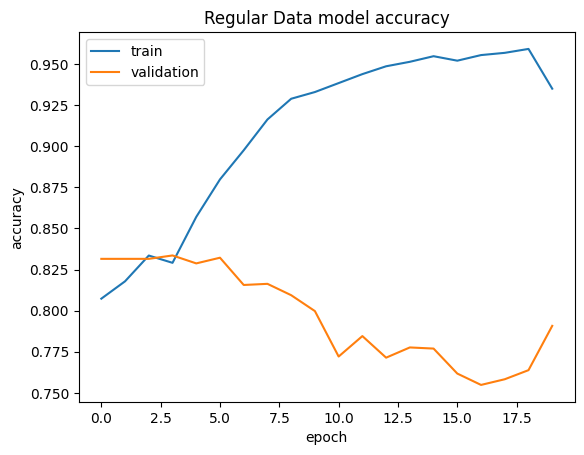

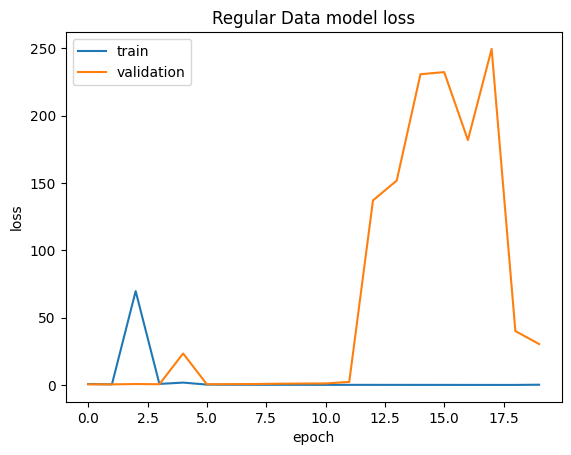

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history_reg.history.keys())
# summarize history for accuracy
plt.plot(history_reg.history['accuracy'])
plt.plot(history_reg.history['val_accuracy'])
plt.title('Regular Data model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Regular Data model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Then, we get the model to predict what house a character would be in based on its training, and create a confusion matrix for the predictions.

59/59 [==============================] - 2s 29ms/step
[array(['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'], dtype='<U10')]
[[ 1402.000  0.000  3.000  139.000]
 [ 16.000  0.000  0.000  2.000]
 [ 59.000  0.000  1.000  10.000]
 [ 176.000  0.000  2.000  70.000]]
None


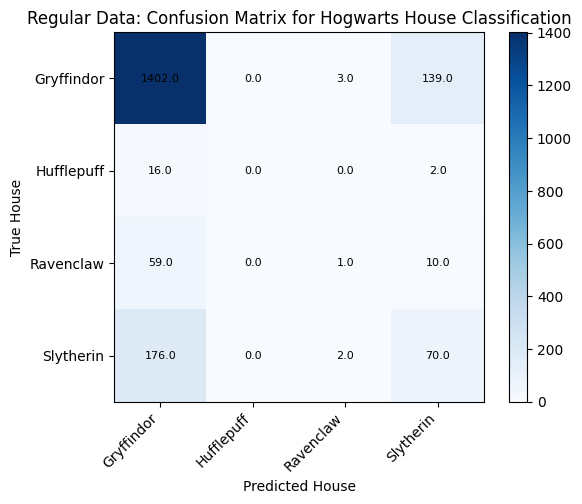

In [ ]:
# Try on specific dialogue:
prediction = model_reg.predict(reg_val_data)
houses_prediction_vs_real = np.zeros(shape=(4,4))

#defining the display funcrion
def GFG(arr):
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print(arr)

for i in range(len(reg_val_labels)):
  #print(val_data[i])
  houses_prediction_vs_real[np.argmax(reg_val_labels[i]), np.argmax(prediction[i])] += 1

print(encoder.categories_)
print(GFG(houses_prediction_vs_real))

# Generate Confusion Matrix Visualized
cm_data = np.array(houses_prediction_vs_real)

# Define classes
classes = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

# Create the confusion matrix plot
fig, ax = plt.subplots()
im = ax.imshow(cm_data, cmap='Blues')

# Add colorbar
fig.colorbar(im)

# Add class labels to ticks
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)

# Add text labels for each cell (optional)
for i in range(len(cm_data)):
  for j in range(len(cm_data[0])):
    ax.text(j, i, cm_data[i, j], ha='center', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted House')
ax.set_ylabel('True House')
ax.set_title('Regular Data: Confusion Matrix for Hogwarts House Classification')

plt.show()

#Shorten Data to balance Training Data:

This section trains the model on the shortened dataset.

In [ ]:
model_short = Sequential()
model_short.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_short.add(LSTM(40, input_shape=(max_length, embedding_dim), return_sequences=True, activation='relu')), # change relu to something else and see what happens.
model_short.add(LSTM(40, activation='relu'))
model_short.add(Dense(4, activation='softmax'))

In [ ]:
print(model_short.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 105, 100)          542500    
                                                                 
 lstm_22 (LSTM)              (None, 105, 40)           22560     
                                                                 
 lstm_23 (LSTM)              (None, 40)                12960     
                                                                 
 dense_11 (Dense)            (None, 4)                 164       
                                                                 
Total params: 578184 (2.21 MB)
Trainable params: 578184 (2.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Compile the model
model_short.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_short = model_short.fit(short_train_data, short_train_labels, validation_split=0.33, batch_size=30, epochs=20)

Epoch 1/20
4/4 [==============================] - 4s 280ms/step - loss: 1.3866 - accuracy: 0.2474 - val_loss: 1.3846 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 1s 135ms/step - loss: 1.3839 - accuracy: 0.3196 - val_loss: 1.3834 - val_accuracy: 0.2917
Epoch 3/20
4/4 [==============================] - 0s 126ms/step - loss: 1.3816 - accuracy: 0.4227 - val_loss: 1.3818 - val_accuracy: 0.3542
Epoch 4/20
4/4 [==============================] - 1s 126ms/step - loss: 1.3786 - accuracy: 0.4433 - val_loss: 1.3801 - val_accuracy: 0.3333
Epoch 5/20
4/4 [==============================] - 0s 117ms/step - loss: 1.3748 - accuracy: 0.4742 - val_loss: 1.3787 - val_accuracy: 0.3750
Epoch 6/20
4/4 [==============================] - 0s 130ms/step - loss: 1.3693 - accuracy: 0.5052 - val_loss: 1.3770 - val_accuracy: 0.4167
Epoch 7/20
4/4 [==============================] - 0s 117ms/step - loss: 1.3611 - accuracy: 0.5052 - val_loss: 1.3745 - val_accuracy: 0.3542
Epoch 8/20
4/4 [====

Below we plot the model accuracy and loss for the shortened dataset.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


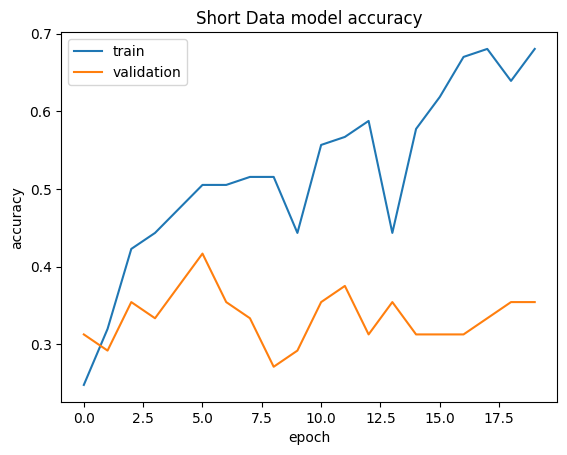

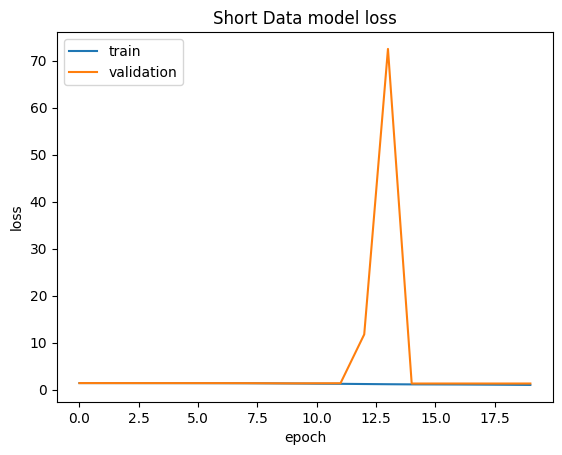

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history_short.history.keys())
# summarize history for accuracy
plt.plot(history_short.history['accuracy'])
plt.plot(history_short.history['val_accuracy'])
plt.title('Short Data model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_short.history['loss'])
plt.plot(history_short.history['val_loss'])
plt.title('Short Data model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Then, we get the model to predict what house a character would be in based on its training, and create a confusion matrix for the predictions.

2/2 [==============================] - 0s 64ms/step
[array(['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'], dtype='<U10')]
[[ 12.000  0.000  1.000  2.000]
 [ 12.000  0.000  7.000  1.000]
 [ 12.000  0.000  4.000  1.000]
 [ 9.000  0.000  2.000  0.000]]
None


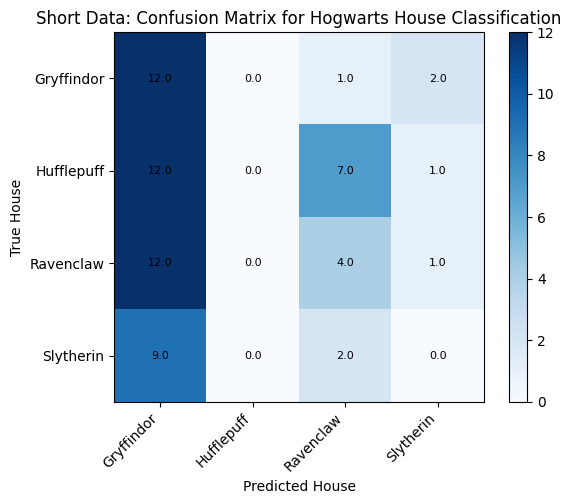

In [ ]:
# Try on specific dialogue:
prediction = model_short.predict(short_val_data)
houses_prediction_vs_real = np.zeros(shape=(4,4))

#defining the display funcrion
def GFG(arr):
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print(arr)

for i in range(len(short_val_labels)):
  #print(val_data[i])
  houses_prediction_vs_real[np.argmax(short_val_labels[i]), np.argmax(prediction[i])] += 1

print(encoder.categories_)
print(GFG(houses_prediction_vs_real))

# Generate Confusion Matrix Visualized
cm_data = np.array(houses_prediction_vs_real)

# Define classes
classes = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

# Create the confusion matrix plot
fig, ax = plt.subplots()
im = ax.imshow(cm_data, cmap='Blues')

# Add colorbar
fig.colorbar(im)

# Add class labels to ticks
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)

# Add text labels for each cell (optional)
for i in range(len(cm_data)):
  for j in range(len(cm_data[0])):
    ax.text(j, i, cm_data[i, j], ha='center', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted House')
ax.set_ylabel('True House')
ax.set_title('Short Data: Confusion Matrix for Hogwarts House Classification')

plt.show()

#Duplicate Data to balance Training Data:

This section trains the model on the duplicated dataset.

In [ ]:
model_dup = Sequential()
model_dup.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_dup.add(LSTM(40, input_shape=(max_length, embedding_dim), return_sequences=True, activation='relu')), # change relu to something else and see what happens.
model_dup.add(LSTM(40, activation='relu'))
model_dup.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model_dup.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_dup = model_dup.fit(dup_train_data, dup_train_labels, validation_split=0.33, batch_size=30, epochs=20)

Epoch 1/20
323/323 [==============================] - 45s 127ms/step - loss: 3.4358 - accuracy: 0.4395 - val_loss: 1.2015 - val_accuracy: 0.5383
Epoch 2/20
323/323 [==============================] - 42s 129ms/step - loss: 5.2796 - accuracy: 0.5695 - val_loss: 1.2192 - val_accuracy: 0.5587
Epoch 3/20
323/323 [==============================] - 42s 129ms/step - loss: 1.0884 - accuracy: 0.6005 - val_loss: 0.9588 - val_accuracy: 0.6132
Epoch 4/20
323/323 [==============================] - 43s 132ms/step - loss: 0.9279 - accuracy: 0.6677 - val_loss: 0.8155 - val_accuracy: 0.6859
Epoch 5/20
323/323 [==============================] - 42s 130ms/step - loss: 0.6751 - accuracy: 0.7321 - val_loss: 0.6568 - val_accuracy: 0.7321
Epoch 6/20
323/323 [==============================] - 42s 130ms/step - loss: 375.6714 - accuracy: 0.7455 - val_loss: 0.7882 - val_accuracy: 0.7275
Epoch 7/20
323/323 [==============================] - 41s 128ms/step - loss: 508.4080 - accuracy: 0.7526 - val_loss: 0.7455 - va

Below we plot the model accuracy and loss for the shortened dataset.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


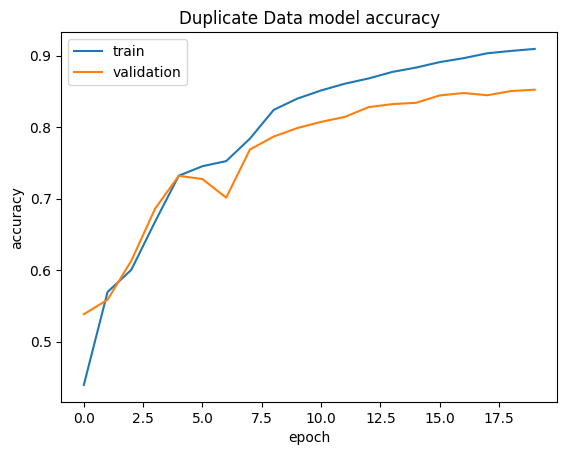

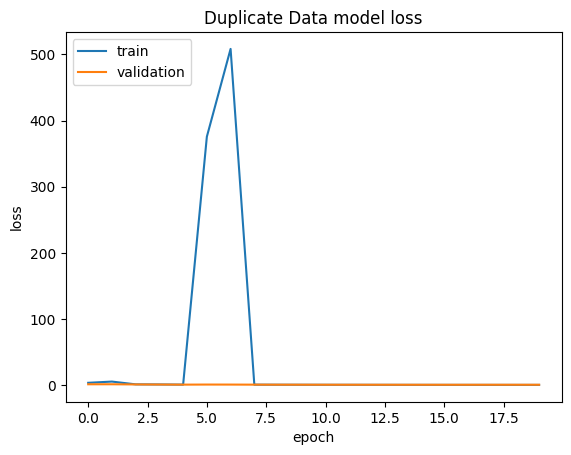

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history_dup.history.keys())
# summarize history for accuracy
plt.plot(history_dup.history['accuracy'])
plt.plot(history_dup.history['val_accuracy'])
plt.title('Duplicate Data model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_dup.history['loss'])
plt.plot(history_dup.history['val_loss'])
plt.title('Duplicate Data model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Then, we get the model to predict what house a character would be in based on its training, and create a confusion matrix for the predictions.

194/194 [==============================] - 5s 26ms/step
[array(['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin'], dtype='<U10')]
[[ 1140.000  93.000  63.000  217.000]
 [ 140.000  1441.000  5.000  3.000]
 [ 81.000  5.000  1433.000  8.000]
 [ 235.000  25.000  28.000  1263.000]]
None


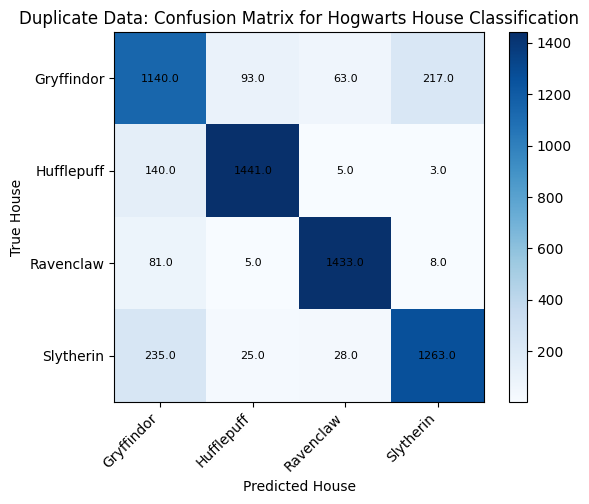

In [ ]:
# Try on specific dialogue:
prediction = model_dup.predict(dup_val_data)
houses_prediction_vs_real = np.zeros(shape=(4,4))

#defining the display funcrion
def GFG(arr):
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print(arr)

for i in range(len(dup_val_labels)):
  #print(val_data[i])
  houses_prediction_vs_real[np.argmax(dup_val_labels[i]), np.argmax(prediction[i])] += 1

print(encoder.categories_)
print(GFG(houses_prediction_vs_real))

# Generate Confusion Matrix Visualized
cm_data = np.array(houses_prediction_vs_real)

# Define classes
classes = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

# Create the confusion matrix plot
fig, ax = plt.subplots()
im = ax.imshow(cm_data, cmap='Blues')

# Add colorbar
fig.colorbar(im)

# Add class labels to ticks
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.set_yticklabels(classes)

# Add text labels for each cell (optional)
for i in range(len(cm_data)):
  for j in range(len(cm_data[0])):
    ax.text(j, i, cm_data[i, j], ha='center', va='center', fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted House')
ax.set_ylabel('True House')
ax.set_title('Duplicate Data: Confusion Matrix for Hogwarts House Classification')

plt.show()

## Testing on outside data

Below we process the Star Wars movie scripts dataset from Kaggle reading from the three .txt files, concatenating them into one pandas dataframe, and doing the same pre-processing steps as we did for the Harry Potter Dataset

In [ ]:
# read dialogue files of first three Star Wars Films
epiv_file_path = '/content/drive/MyDrive/Carl - Other movies/SW_EpisodeIV.txt'
epiv = pd.read_csv(epiv_file_path, sep='" "', encoding = 'ISO-8859-1')

epv_file_path = '/content/drive/MyDrive/Carl - Other movies/SW_EpisodeV.txt'
epv = pd.read_csv(epv_file_path, sep='" "', encoding = 'ISO-8859-1')

epvi_file_path = '/content/drive/MyDrive/Carl - Other movies/SW_EpisodeVI.txt'
epvi = pd.read_csv(epvi_file_path, sep='" "', encoding = 'ISO-8859-1')

<ipython-input-293-b53bd024f02d>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  epiv = pd.read_csv(epiv_file_path, sep='" "', encoding = 'ISO-8859-1')
<ipython-input-293-b53bd024f02d>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  epv = pd.read_csv(epv_file_path, sep='" "', encoding = 'ISO-8859-1')
<ipython-input-293-b53bd024f02d>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  epvi = pd.read_csv(epvi_file_

In [ ]:
# Display some data
epvi.head(15)

"character                                          dialogue"
"1         SHUTTLE CAPTAIN  Command station, this is ST 321. Code Clearanc...
"2   DEATH STAR CONTROLLER  The security deflector shield will be deactiva...
"3         SHUTTLE CAPTAIN                      We're starting our approach."
"4                 OFFICER  Inform the commander that Lord Vader's shuttle...
"5                OPERATOR                                         Yes, sir."
"6               JERJERROD  Lord Vader, this is an unexpected pleasure.  W...
"7                   VADER  You may dispense with the pleasantries, Comman...
"8               JERJERROD  I assure you, Lord Vader, my men are working a...
"9                   VADER     Perhaps I can find new ways to motivate them."
"10              JERJERROD  I tell you, this station will be operational a...
"11                  VADER  The Emperor does not share your optimistic app...
"12              JERJERROD      But he asks the impossible. I need more men."
"13                  VADER    Then perhaps you can tell him when he arrives."
"14              JERJERROD                        The Emperor's coming here?"
"15                  VADER  That is correct, Commander. And he is most dis...

In [ ]:
# rename columns
epiv.rename(columns = {'"character':'character', 'dialogue"':'dialogue'}, inplace=True)
epv.rename(columns = {'"character':'character', 'dialogue"':'dialogue'}, inplace=True)
epvi.rename(columns = {'"character':'character', 'dialogue"':'dialogue'}, inplace=True)

epiv.head(15)

character                                           dialogue
"1           THREEPIO  Did you hear that?  They've shut down the main...
"2           THREEPIO                                     We're doomed!"
"3           THREEPIO  There'll be no escape for the Princess this ti...
"4           THREEPIO                                      What's that?"
"5           THREEPIO  I should have known better than to trust the l...
"6               LUKE  Hurry up!  Come with me!  What are you waiting...
"7           THREEPIO                Artoo! Artoo-Detoo, where are you?"
"8           THREEPIO                    At last!  Where have you been?"
"9           THREEPIO  They're heading in this direction. What are we...
"10          THREEPIO               Wait a minute, where are you going?"
"11  IMPERIAL OFFICER  The Death Star plans are not in the main compu...
"12             VADER    Where are those transmissions you intercepted?"
"13     REBEL OFFICER  We intercepted no transmissions. Aaah...  This...
"14             VADER  If this is a consular ship... where is the Amb...
"15             VADER  Commander, tear this ship apart until you've f...

In [ ]:
# Combine the three films into one dataset
all_scripts = pd.concat([epiv, epv, epvi], ignore_index=True)
all_scripts.head(15)

character                                           dialogue
0           THREEPIO  Did you hear that?  They've shut down the main...
1           THREEPIO                                     We're doomed!"
2           THREEPIO  There'll be no escape for the Princess this ti...
3           THREEPIO                                      What's that?"
4           THREEPIO  I should have known better than to trust the l...
5               LUKE  Hurry up!  Come with me!  What are you waiting...
6           THREEPIO                Artoo! Artoo-Detoo, where are you?"
7           THREEPIO                    At last!  Where have you been?"
8           THREEPIO  They're heading in this direction. What are we...
9           THREEPIO               Wait a minute, where are you going?"
10  IMPERIAL OFFICER  The Death Star plans are not in the main compu...
11             VADER    Where are those transmissions you intercepted?"
12     REBEL OFFICER  We intercepted no transmissions. Aaah...  This...
13             VADER  If this is a consular ship... where is the Amb...
14             VADER  Commander, tear this ship apart until you've f...

In [ ]:
for i in range(len(all_scripts['dialogue'])):
    value = all_scripts['dialogue'][i]

    no_ellipses = remove_ellipses(value)
    no_excess_spaces = remove_excess_spaces(no_ellipses)
    no_punctuation_and_numbers = remove_punctuation_and_numbers(no_excess_spaces)
    clean_sentence = remove_stop_words(no_punctuation_and_numbers.lower())

    all_scripts.loc[i, 'dialogue'] = clean_sentence.lower()

In [ ]:
# View processed data
all_scripts.head(15)

character                                           dialogue
0           THREEPIO  hear theyve shut main reactor well destroyed s...
1           THREEPIO                                             doomed
2           THREEPIO                       therell escape princess time
3           THREEPIO                                              whats
4           THREEPIO  known better trust logic halfsized thermocapsu...
5               LUKE                        hurry come waiting get gear
6           THREEPIO                                   artoo artoodetoo
7           THREEPIO                                               last
8           THREEPIO  theyre heading direction going well sent spice...
9           THREEPIO                                  wait minute going
10  IMPERIAL OFFICER                     death star plans main computer
11             VADER                          transmissions intercepted
12     REBEL OFFICER  intercepted transmissions aaah consular ship d...
13             VADER                           consular ship ambassador
14             VADER  commander tear ship apart youve found plans br...

In [ ]:
#remove any rows with empty strings now
rows_with_empty_strings = all_scripts[all_scripts.eq('').any(axis=1)].index
all_scripts = all_scripts.drop(index=rows_with_empty_strings)

In [ ]:
# checking there are no empty dialogue columns
nan_count = all_scripts['dialogue'].isna().sum()
null_count = all_scripts['dialogue'].isnull().sum()

print("number of NaN entries in Dialogue column:", nan_count)
print("number of null entries in Dialogue column:", null_count)

number of NaN entries in Dialogue column: 0
number of null entries in Dialogue column: 0


In [ ]:
file_path = '/content/drive/MyDrive/Carl - Other movies/' + 'starwars.csv'
all_scripts.to_csv(file_path, index = False)

From the pre-processed Star Wars dataset, we extract lines of the characters with the most dialogue to use for testing

In [ ]:
# Find the characters that have the most lines
line_counts = all_scripts['character'].value_counts()
print(line_counts)
# LUKE, HAN, THREEPIO, LEIA, VADER have the most lines

character
LUKE                 479
HAN                  446
THREEPIO             300
LEIA                 215
VADER                137
                    ... 
OPERATOR               1
DEAK                   1
ASSISTANT OFFICER      1
HOBBIE                 1
CONTROL OFFICER        1
Name: count, Length: 129, dtype: int64


In [ ]:
# get the lines of the top 5 characters
LUKE_lines = all_scripts[all_scripts['character'] == 'LUKE']
HAN_lines = all_scripts[all_scripts['character'] == 'HAN']
THREEPIO_lines = all_scripts[all_scripts['character'] == 'THREEPIO']
LEIA_lines = all_scripts[all_scripts['character'] == 'LEIA']
VADER_lines = all_scripts[all_scripts['character'] == 'VADER']

In [ ]:
# Export CSVs for each character
file_path = '/content/drive/MyDrive/' + 'LUKE.csv'
LUKE_lines.to_csv(file_path, index = False)

file_path = '/content/drive/MyDrive/' + 'HAN.csv'
HAN_lines.to_csv(file_path, index = False)

file_path = '/content/drive/MyDrive/' + 'THREEPIO.csv'
THREEPIO_lines.to_csv(file_path, index = False)

file_path = '/content/drive/MyDrive/' + 'LEIA.csv'
LEIA_lines.to_csv(file_path, index = False)

file_path = '/content/drive/MyDrive/' + 'VADER.csv'
VADER_lines.to_csv(file_path, index = False)

##Testing Model on this new Data

Now that we've pre-processed the dialogue from the Star Wars movies, we run the Duplicated Model to predict what house the aforementioned characters would be in.

We follow the same steps to tokenize the datasets as earlier.

In [ ]:
# Preprocessing the new data:
# Read the pre-processed CSV file
luke_df = pd.read_csv('/content/drive/My Drive/LUKE.csv')
han_df = pd.read_csv('/content/drive/My Drive/HAN.csv')
threepio_df = pd.read_csv('/content/drive/My Drive/THREEPIO.csv')
leia_df = pd.read_csv('/content/drive/My Drive/LEIA.csv')
vader_df = pd.read_csv('/content/drive/My Drive/VADER.csv')

# Convert the DataFrame to a multi-dimensional array
array = []
array.append(luke_df.values)
array.append(han_df.values)
array.append(threepio_df.values)
array.append(leia_df.values)
array.append(vader_df.values)

print(array[0])

names = ['Luke', ' Han', 'Threepio', 'Leia', 'Vader']

[['LUKE' 'hurry come waiting get gear']
 ['LUKE' 'shape guys biggs']
 ['LUKE' 'didnt know back get']
 ['LUKE'
  'academy didnt change much youre back soon hey happened didnt get commission']
 ['LUKE' 'almost forgot theres battle going right system come look']
 ['LUKE' 'lot firing earlier']
 ['LUKE' 'hey easy']
 ['LUKE'
  'cut power shut afterburners came low deaks trail close thought going fry instruments busted skyhopper pretty bad uncle owen pretty upset grounded rest season fantastic']
 ['LUKE'
  'look whos talking youve around giant starships youre beginning sound like uncle youve gotten soft city']
 ['LUKE' 'well things havent since left biggs quiet']
 ['LUKE' 'talking']
 ['LUKE' 'join rebellion kidding']
 ['LUKE' 'im sorry im quiet listen quiet barely hear']
 ['LUKE' 'around forever trying find']
 ['LUKE' 'im stuck']
 ['LUKE'
  'likely cancel application lot unrest among sand people since left theyve even raided outskirts anchorhead']
 ['LUKE'
  'know hes got enough vaporators go

In [ ]:
testing_text = []

for data in array:
  text = []
  for i in range(len(data)):
    text.append(data[i,1])

  print(text)
  testing_text.append(text)

print(testing_text)

['hurry come waiting get gear', 'shape guys biggs', 'didnt know back get', 'academy didnt change much youre back soon hey happened didnt get commission', 'almost forgot theres battle going right system come look', 'lot firing earlier', 'hey easy', 'cut power shut afterburners came low deaks trail close thought going fry instruments busted skyhopper pretty bad uncle owen pretty upset grounded rest season fantastic', 'look whos talking youve around giant starships youre beginning sound like uncle youve gotten soft city', 'well things havent since left biggs quiet', 'talking', 'join rebellion kidding', 'im sorry im quiet listen quiet barely hear', 'around forever trying find', 'im stuck', 'likely cancel application lot unrest among sand people since left theyve even raided outskirts anchorhead', 'know hes got enough vaporators going make place pay needs one season cant leave', 'couldnt happen said empire wont bother rock', 'wish going going around long', 'guess wont see', 'well ill academ

In [ ]:
testing_new = []
for test_text in testing_text:
  tes_txt = []
  for sentance in test_text:
    test_sentance = []
    sentance = sentance.split(' ')
    for word in sentance:
      if word in sorteduW:
        test_sentance.append(word)
    tes_txt.append(test_sentance)
  testing_new.append(tes_txt)

print(testing_new)

[[['hurry', 'come', 'waiting', 'get'], ['shape', 'guys'], ['didnt', 'know', 'back', 'get'], ['academy', 'didnt', 'change', 'much', 'youre', 'back', 'soon', 'hey', 'happened', 'didnt', 'get'], ['almost', 'forgot', 'theres', 'battle', 'going', 'right', 'come', 'look'], ['lot', 'earlier'], ['hey', 'easy'], ['cut', 'power', 'shut', 'came', 'low', 'trail', 'close', 'thought', 'going', 'pretty', 'bad', 'uncle', 'pretty', 'rest', 'season'], ['look', 'whos', 'talking', 'youve', 'around', 'giant', 'youre', 'beginning', 'sound', 'like', 'uncle', 'youve', 'gotten'], ['well', 'things', 'havent', 'since', 'left', 'quiet'], ['talking'], ['join', 'kidding'], ['im', 'sorry', 'im', 'quiet', 'listen', 'quiet', 'barely', 'hear'], ['around', 'forever', 'trying', 'find'], ['im', 'stuck'], ['likely', 'cancel', 'application', 'lot', 'among', 'people', 'since', 'left', 'theyve', 'even', 'outskirts'], ['know', 'hes', 'got', 'enough', 'going', 'make', 'place', 'pay', 'needs', 'one', 'season', 'cant', 'leave'], 

In [ ]:
# Use the same tokenizer

# Tokenize the texts and create a vocabulary
testing_sequences = []

for text in testing_text:
  tokenizer.fit_on_texts(text)
  testing_sequences.append(tokenizer.texts_to_sequences(text))

for sequence in testing_sequences:
  for sentance in sequence:
    for word in sentance:
      if word > 5424:
        print(f"Error: {word}")

print(testing_sequences[0])
print(len(testing_sequences[0]))

[[424, 11, 534, 15, 3696], [1058, 1527, 852], [40, 4, 25, 15], [1775, 40, 628, 84, 18, 25, 373, 124, 202, 40, 15, 2236], [370, 1557, 35, 1258, 20, 16, 460, 11, 24], [262, 3697, 1257], [124, 281], [792, 174, 348, 3698, 220, 2310, 3699, 2309, 257, 64, 20, 3700, 3701, 3702, 3703, 453, 144, 442, 970, 453, 2681, 3704, 284, 1573, 3705], [24, 153, 135, 71, 160, 2327, 2682, 18, 891, 727, 12, 442, 71, 1007, 3706, 2092], [2, 76, 247, 376, 315, 852, 343], [135], [655, 1287, 2284], [5, 47, 5, 343, 201, 343, 1794, 131], [160, 911, 272, 51], [5, 1986], [1160, 3439, 2308, 262, 3707, 3099, 992, 101, 376, 315, 533, 96, 3708, 3113, 2523], [4, 22, 21, 169, 2237, 20, 55, 158, 479, 827, 8, 1573, 37, 136], [203, 481, 48, 783, 86, 1932, 1914], [307, 20, 20, 160, 154], [514, 86, 6], [2, 30, 1775, 261, 1573, 371, 86, 3709, 751, 2683, 17, 73, 33, 311, 75, 83, 129, 134, 29, 21], [211, 12, 1, 84, 691, 30, 1070], [20, 3710, 956, 528, 174, 2524], [16, 11, 839, 8, 11, 2, 11, 839, 80, 13], [442, 970], [768, 711, 144,

In [ ]:
# Pad the sequences so they all have the same length
# Using max length from trianing

test_sequences = []
for sequence in testing_sequences:
  test_sequences.append(pad_sequences(sequence, maxlen=max_length))

print(test_sequences)
print(len(test_sequences[0]))

[array([[   0,    0,    0, ...,  534,   15, 3696],
       [   0,    0,    0, ..., 1058, 1527,  852],
       [   0,    0,    0, ...,    4,   25,   15],
       ...,
       [   0,    0,    0, ...,   58,   74,   59],
       [   0,    0,    0, ...,   29,   21,  327],
       [   0,    0,    0, ...,   58,   86,  136]], dtype=int32), array([[   0,    0,    0, ..., 1852,  638,  446],
       [   0,    0,    0, ...,  218, 1591, 1060],
       [   0,    0,    0, ..., 1098,  771, 3809],
       ...,
       [   0,    0,    0, ...,  416,  198,  883],
       [   0,    0,    0, ...,    0,  364,  364],
       [   0,    0,    0, ...,    0,    0,  377]], dtype=int32), array([[   0,    0,    0, ...,  709,   71, 2701],
       [   0,    0,    0, ...,    0,    0, 1281],
       [   0,    0,    0, ...,  821,  395,   30],
       ...,
       [   0,    0,    0, ...,  817,   69,  918],
       [   0,    0,    0, ...,  395,  301,   16],
       [   0,    0,    0, ...,    0,    7,   61]], dtype=int32), array([[   0,    0

Below we can see the model's predictions for each character based on their dialogue.

15/15 [==============================] - 1s 63ms/step


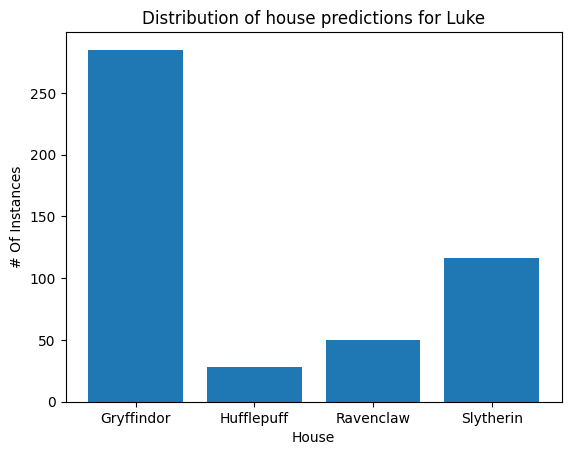

Guess for Luke:
Gryffindor
14/14 [==============================] - 1s 54ms/step


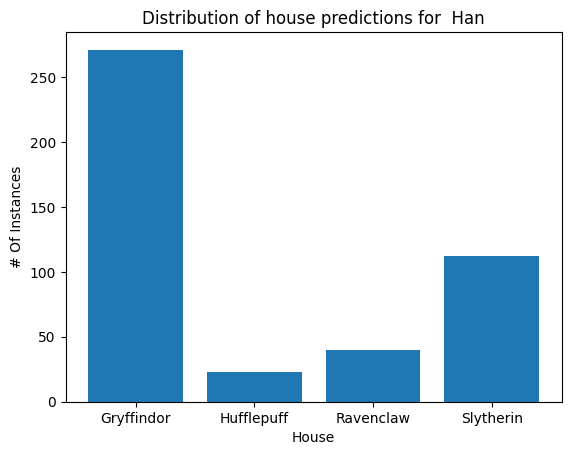

Guess for  Han:
Gryffindor
10/10 [==============================] - 1s 48ms/step


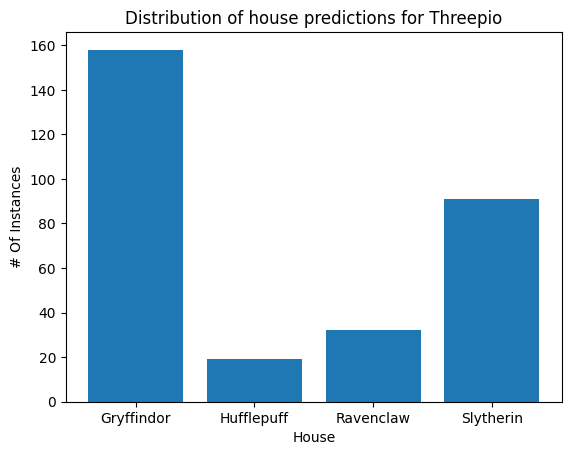

Guess for Threepio:
Gryffindor
7/7 [==============================] - 0s 28ms/step


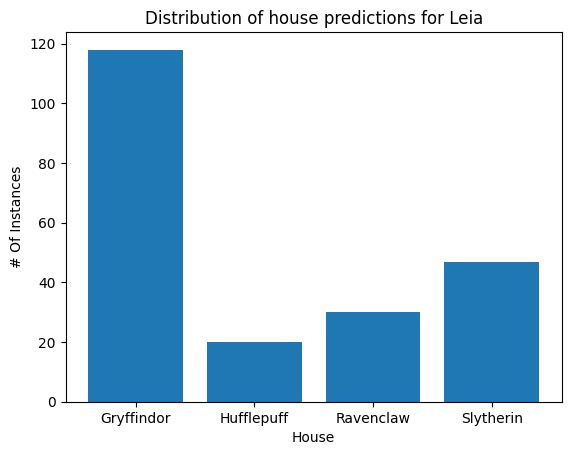

Guess for Leia:
Gryffindor
5/5 [==============================] - 0s 24ms/step


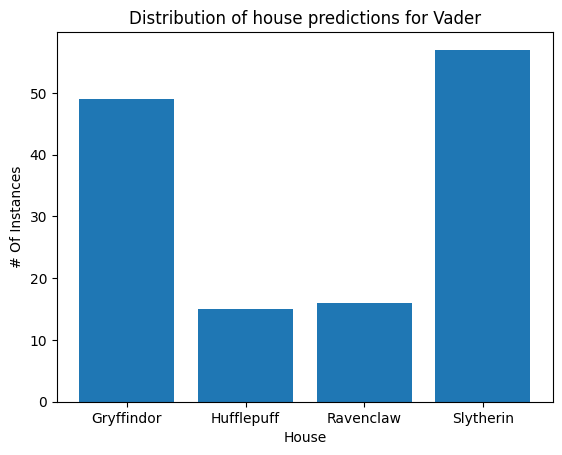

Guess for Vader:
Slytherin


In [ ]:
# Try on specific dialogue:
# Duplicate model is the best one

houses = ['Gryffindor', 'Hufflepuff', 'Ravenclaw', 'Slytherin']

for j in range(len(test_sequences)):
  prediction = model_dup.predict(test_sequences[j])

  #defining the display function
  def GFG(arr):
      np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
      print(arr)

  train_prediction = np.zeros(4)
  for i in range(len(prediction)):
    train_prediction[np.argmax(prediction[i])] += 1

  guess = np.argmax(train_prediction)

  plt.bar(houses, train_prediction)
  plt.title(f'Distribution of house predictions for {names[j]}')
  plt.ylabel('# Of Instances')
  plt.xlabel('House')
  plt.show()

  print(f"Guess for {names[j]}:")
  print(encoder.categories_[0][guess])